### Importing the Required Libraries

In [77]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [78]:
pp = pd.read_csv("/Users/akashsharma/Downloads/My Space/online-study/yash_notes/csv files/linear/Property_Price_Train.csv")
pp.head(5)

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type Lane_Type  \
0   1              60          RLD        65.0      8450     Paved       NaN   
1   2              20          RLD        80.0      9600     Paved       NaN   
2   3              60          RLD        68.0     11250     Paved       NaN   
3   4              70          RLD        60.0      9550     Paved       NaN   
4   5              60          RLD        84.0     14260     Paved       NaN   

  Property_Shape Land_Outline Utility_Type  ... Pool_Area Pool_Quality  \
0            Reg          Lvl       AllPub  ...         0          NaN   
1            Reg          Lvl       AllPub  ...         0          NaN   
2            IR1          Lvl       AllPub  ...         0          NaN   
3            IR1          Lvl       AllPub  ...         0          NaN   
4            IR1          Lvl       AllPub  ...         0          NaN   

  Fence_Quality Miscellaneous_Feature Miscellaneous_Value Month_Sold  \
0           NaN                   NaN                   0          2   
1           NaN                   NaN                   0          5   
2           NaN                   NaN                   0          9   
3           NaN                   NaN                   0          2   
4           NaN                   NaN                   0         12   

  Year_Sold  Sale_Type  Sale_Condition  Sale_Price  
0      2008         WD          Normal      208500  
1      2007         WD          Normal      181500  
2      2008         WD          Normal      223500  
3      2006         WD         Abnorml      140000  
4      2008         WD          Normal      250000  

[5 rows x 81 columns]

#### Checking the nulls

In [79]:
pp.isnull().sum()[pp.isnull().sum()>0]

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type           8
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [80]:
pp.isnull().sum()[pp.isnull().sum()*100 / pp.shape[0] > 40]

Lane_Type                1368
Fireplace_Quality         689
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [81]:
pp.drop(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality', 'Miscellaneous_Feature', 'House_Design', 'Neighborhood'], axis=1, inplace=True)

In [82]:
pp.isnull().sum()[pp.isnull().sum()>0]

Lot_Extent            259
Brick_Veneer_Type       8
Brick_Veneer_Area       8
Basement_Height        37
Basement_Condition     37
Exposure_Level         38
BsmtFinType1           37
BsmtFinType2           38
Electrical_System       1
Garage                 81
Garage_Built_Year      81
Garage_Finish_Year     81
Garage_Quality         81
Garage_Condition       81
dtype: int64

In [83]:
pp.Lot_Extent.value_counts()
pp.Lot_Extent.fillna(pp.Lot_Extent.mean(), inplace=True)
pp.Brick_Veneer_Type.value_counts()
pp.Brick_Veneer_Type.fillna('None', inplace=True)
pp.Brick_Veneer_Area.value_counts()
pp.Brick_Veneer_Area.fillna(0.0, inplace=True)
pp.Brick_Veneer_Area.value_counts()
pp.Basement_Height.value_counts()
pp.Basement_Height.fillna('TA', inplace=True)
pp.Basement_Condition.value_counts()
pp.Basement_Condition.fillna('TA', inplace=True)
pp.Exposure_Level.value_counts()
pp.Exposure_Level.fillna('No', inplace=True)
pp.BsmtFinType1.value_counts()
pp.BsmtFinType1.fillna('Unf', inplace=True)
pp.BsmtFinType2.value_counts()
pp.BsmtFinType2.fillna('Unf', inplace=True)
pp.Electrical_System.value_counts()
pp.Electrical_System.fillna('SBrkr', inplace= True)
pp.Garage.value_counts()
pp.Garage.fillna('Attchd', inplace=True)
pp.Garage_Built_Year.value_counts()
pp.Garage_Built_Year.fillna(pp.Garage_Built_Year.mean(), inplace=True)
pp.Garage_Finish_Year.value_counts()
pp.Garage_Finish_Year.fillna('Unf', inplace=True)
pp.Garage_Quality.value_counts()
pp.Garage_Quality.fillna('TA', inplace=True)
pp.Garage_Condition.value_counts()
pp.Garage_Condition.fillna('TA', inplace=True)
pp.Garage_Condition.value_counts()

TA    1406
Fa      35
Gd       9
Po       7
Ex       2
Name: Garage_Condition, dtype: int64

In [84]:
pp.isnull().sum()[pp.isnull().sum()>0]

Series([], dtype: int64)

#### Checking the Datatype

In [85]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1459 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Property_Shape             1459 non-null   object 
 7   Land_Outline               1459 non-null   object 
 8   Utility_Type               1459 non-null   object 
 9   Lot_Configuration          1459 non-null   object 
 10  Property_Slope             1459 non-null   object 
 11  Condition1                 1459 non-null   object 
 12  Condition2                 1459 non-null   object 
 13  House_Type                 1459 non-null   objec

#### Converting non-numeric data into numeric data

In [86]:
pp.head(5)

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type  \
0   1              60          RLD        65.0      8450     Paved   
1   2              20          RLD        80.0      9600     Paved   
2   3              60          RLD        68.0     11250     Paved   
3   4              70          RLD        60.0      9550     Paved   
4   5              60          RLD        84.0     14260     Paved   

  Property_Shape Land_Outline Utility_Type Lot_Configuration  ...  \
0            Reg          Lvl       AllPub                 I  ...   
1            Reg          Lvl       AllPub              FR2P  ...   
2            IR1          Lvl       AllPub                 I  ...   
3            IR1          Lvl       AllPub                 C  ...   
4            IR1          Lvl       AllPub              FR2P  ...   

  Enclosed_Lobby_Area Three_Season_Lobby_Area Screen_Lobby_Area Pool_Area  \
0           20.337934                       0                 0         0   
1           15.039392                       0                 0         0   
2          -46.232198                       0                 0         0   
3           60.921821                       0                 0         0   
4           21.788818                       0                 0         0   

   Miscellaneous_Value  Month_Sold  Year_Sold  Sale_Type Sale_Condition  \
0                    0           2       2008         WD         Normal   
1                    0           5       2007         WD         Normal   
2                    0           9       2008         WD         Normal   
3                    0           2       2006         WD        Abnorml   
4                    0          12       2008         WD         Normal   

  Sale_Price  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 74 columns]

In [87]:
pp.columns[pp.dtypes=='object']


Index(['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Condition1',
       'Condition2', 'House_Type', 'Roof_Design', 'Roof_Quality',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Garage',
       'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition',
       'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [88]:

pp.Garage_Quality.value_counts()
pp.Garage_Quality.replace({'TA': 0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}, inplace=True)
pp.Garage_Condition.value_counts()
pp.Garage_Condition.replace({'TA': 0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}, inplace=True)
pp.Heating_Quality.value_counts()
pp.Heating_Quality.replace({'TA': 0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}, inplace=True)
pp.Kitchen_Quality.value_counts()
pp.Kitchen_Quality.replace({'TA': 0, 'Fa':1, 'Gd':2, 'Ex':3}, inplace=True)
pp.Basement_Height.value_counts()
pp.Basement_Height.replace({'TA': 0, 'Fa':1, 'Gd':2, 'Ex':3}, inplace=True)
pp.Basement_Condition.value_counts()
pp.Basement_Condition.replace({'TA': 0, 'Fa':1, 'Gd':2, 'Po':4}, inplace=True)
pp.Exterior_Condition.value_counts()
pp.Exterior_Condition.replace({'TA': 0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}, inplace=True)
pp.Exterior_Material.value_counts()
pp.Exterior_Material.replace({'TA': 0, 'Fa':1, 'Gd':2, 'Ex':3}, inplace=True)

pp.Condition1.value_counts()
pp.Condition1.replace({'Norm': 0, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRNn':7, 'RRNe':8}, inplace=True)
pp.Condition2.value_counts()
pp.Condition2.replace({'Norm': 0, 'Feedr':1, 'Artery':2, 'RRAn':3,'PosN':4, 'RRAe':5, 'PosA':6, 'RRNn':7}, inplace=True)
pp.BsmtFinType1.value_counts()
pp.BsmtFinType1.replace({'Unf': 0, 'GLQ':1, 'ALQ':2, 'BLQ': 3, 'Rec':4, 'LwQ':5}, inplace=True)
pp.BsmtFinType2.value_counts()
pp.BsmtFinType2.replace({'Unf': 0, 'GLQ':1, 'ALQ':2, 'BLQ': 3, 'Rec':4, 'LwQ':5}, inplace=True)
 
pp.Roof_Quality.value_counts() 
pp.Roof_Quality.replace({'SS':0, 'TG':1, 'WSh':2, 'WS':3, 'ME':4, 'M':5, 'R':6, 'CT':7}, inplace=True)
pp.Property_Slope.value_counts() 
pp.Property_Slope.replace({'SS': 0, 'MS':1, 'GS':2}, inplace=True)
pp.Functional_Rate.value_counts() 
pp.Functional_Rate.replace({'TF':0, 'MS':1, 'MD1':2, 'MD2':3, 'MajD1':4, 'MD': 5, 'MajD2':6, 'SD':7}, inplace=True)

pp.Air_Conditioning.value_counts() 
pp.Air_Conditioning.replace({'N':0, 'Y':1}, inplace=True)
pp.Pavedd_Drive.value_counts() 
pp.Pavedd_Drive.replace({'N':0, 'Y':1, 'P':2}, inplace=True)
pp.Condition1.value_counts()

pp.Brick_Veneer_Type.value_counts()
pp.Brick_Veneer_Type.replace({'None':0, 'BrkFace':1, 'Stone': 2, 'BrkCmn': 3}, inplace=True)
pp.Exterior1st.value_counts()
pp.Exterior1st.replace({'VinylSd':0,  'BrkFace':1, 'Stone':2,'Wd Sdng':3, 'Plywood':4, 'CemntBd':5, 'HdBoard':6,
                         'Stucco':7, 'AsbShng':8,'MetalSd':9,'AsphShn':10, 'ImStucc':11,
                        'CBlock':12,'WdShing':13, 'BrkComm':14,}, inplace=True)

pp.Exterior2nd.value_counts()
pp.Exterior2nd.replace({'VinylSd':0,  'BrkFace':1,'Stone':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5,'HdBoard':6,
                        'Stucco':7, 'AsbShng':8, 'MetalSd':9,'AsphShn':10, 'ImStucc':11,
                        'CBlock':12,'Wd Shng':13, 'Brk Cmn':14, 'Other': 15 }, inplace=True)



In [89]:

pp.Zoning_Class.value_counts()
pp.Zoning_Class.replace({'RLD':0, 'RMD':1, 'FVR':2, 'RHD':3, 'Commer':4}, inplace=True)
pp.Road_Type.value_counts()
pp.Road_Type.replace({'Paved':0, 'Gravel':1}, inplace=True)
pp.Property_Shape.value_counts()
pp.Property_Shape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}, inplace=True)
pp.Land_Outline.value_counts()
pp.Land_Outline.replace({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3}, inplace= True)
pp.Utility_Type.value_counts()
pp.Utility_Type.replace({'AllPub':0, 'NoSeWa':1},inplace= True)
pp.Lot_Configuration.value_counts()
pp.Lot_Configuration.replace({'I':0, 'C':1, 'CulDSac':2, 'FR2P':3, 'FR3P':4}, inplace=True)

pp.Foundation_Type.value_counts()
pp.Foundation_Type.replace({'PC':0, 'CB':1, 'BT':2, 'SL':3, 'S':4, 'W':5}, inplace=True)
pp.Exposure_Level.value_counts()
pp.Exposure_Level.replace({'No':0, 'Av':1, 'Gd':2, 'Mn':3}, inplace=True)
pp.Heating_Type.value_counts()
pp.Heating_Type.replace({'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4, 'Floor':5}, inplace=True)
pp.Electrical_System.value_counts()
pp.Electrical_System.replace({'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}, inplace=True)
pp.Garage.value_counts()
pp.Garage.replace({'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2TFes':5, '2Types':6}, inplace=True)
pp.Garage_Finish_Year.value_counts()
pp.Garage_Finish_Year.replace({'Unf':0, 'RFn':1, 'Fin':2}, inplace=True)
pp.Sale_Type.value_counts()
pp.Sale_Type.replace({'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4, 'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}, inplace=True)
pp.Sale_Condition.value_counts()
pp.Sale_Condition.replace({'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5}, inplace=True)
pp.Heating_Type.value_counts()


pp.Roof_Design.value_counts()
pp.Roof_Design.replace({'Gable':0, 'Hip':1, 'Flat':2, 'Gambrel':3, 'Mansard':4, 'Shed':5}, inplace=True)
pp.House_Type.value_counts()
pp.House_Type.replace({'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, '2fmCon':4}, inplace=True)




In [90]:
pp.columns[pp.dtypes=='object']

Index([], dtype='object')

#### Removing Outliers

In [126]:
def remove_outliers(df,  col, k = 2 ):   
    mean = df[col].mean()
    global df1
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]         
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
    print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])


In [127]:
remove_outliers(pp , "Sale_Price" , 2)

(1396, 74)
Number of outliers removed == > 63


In [129]:
pp.columns[pp.dtypes=='object']

Index([], dtype='object')

In [130]:
import warnings 
warnings.filterwarnings("ignore")

### Visualizing the Data

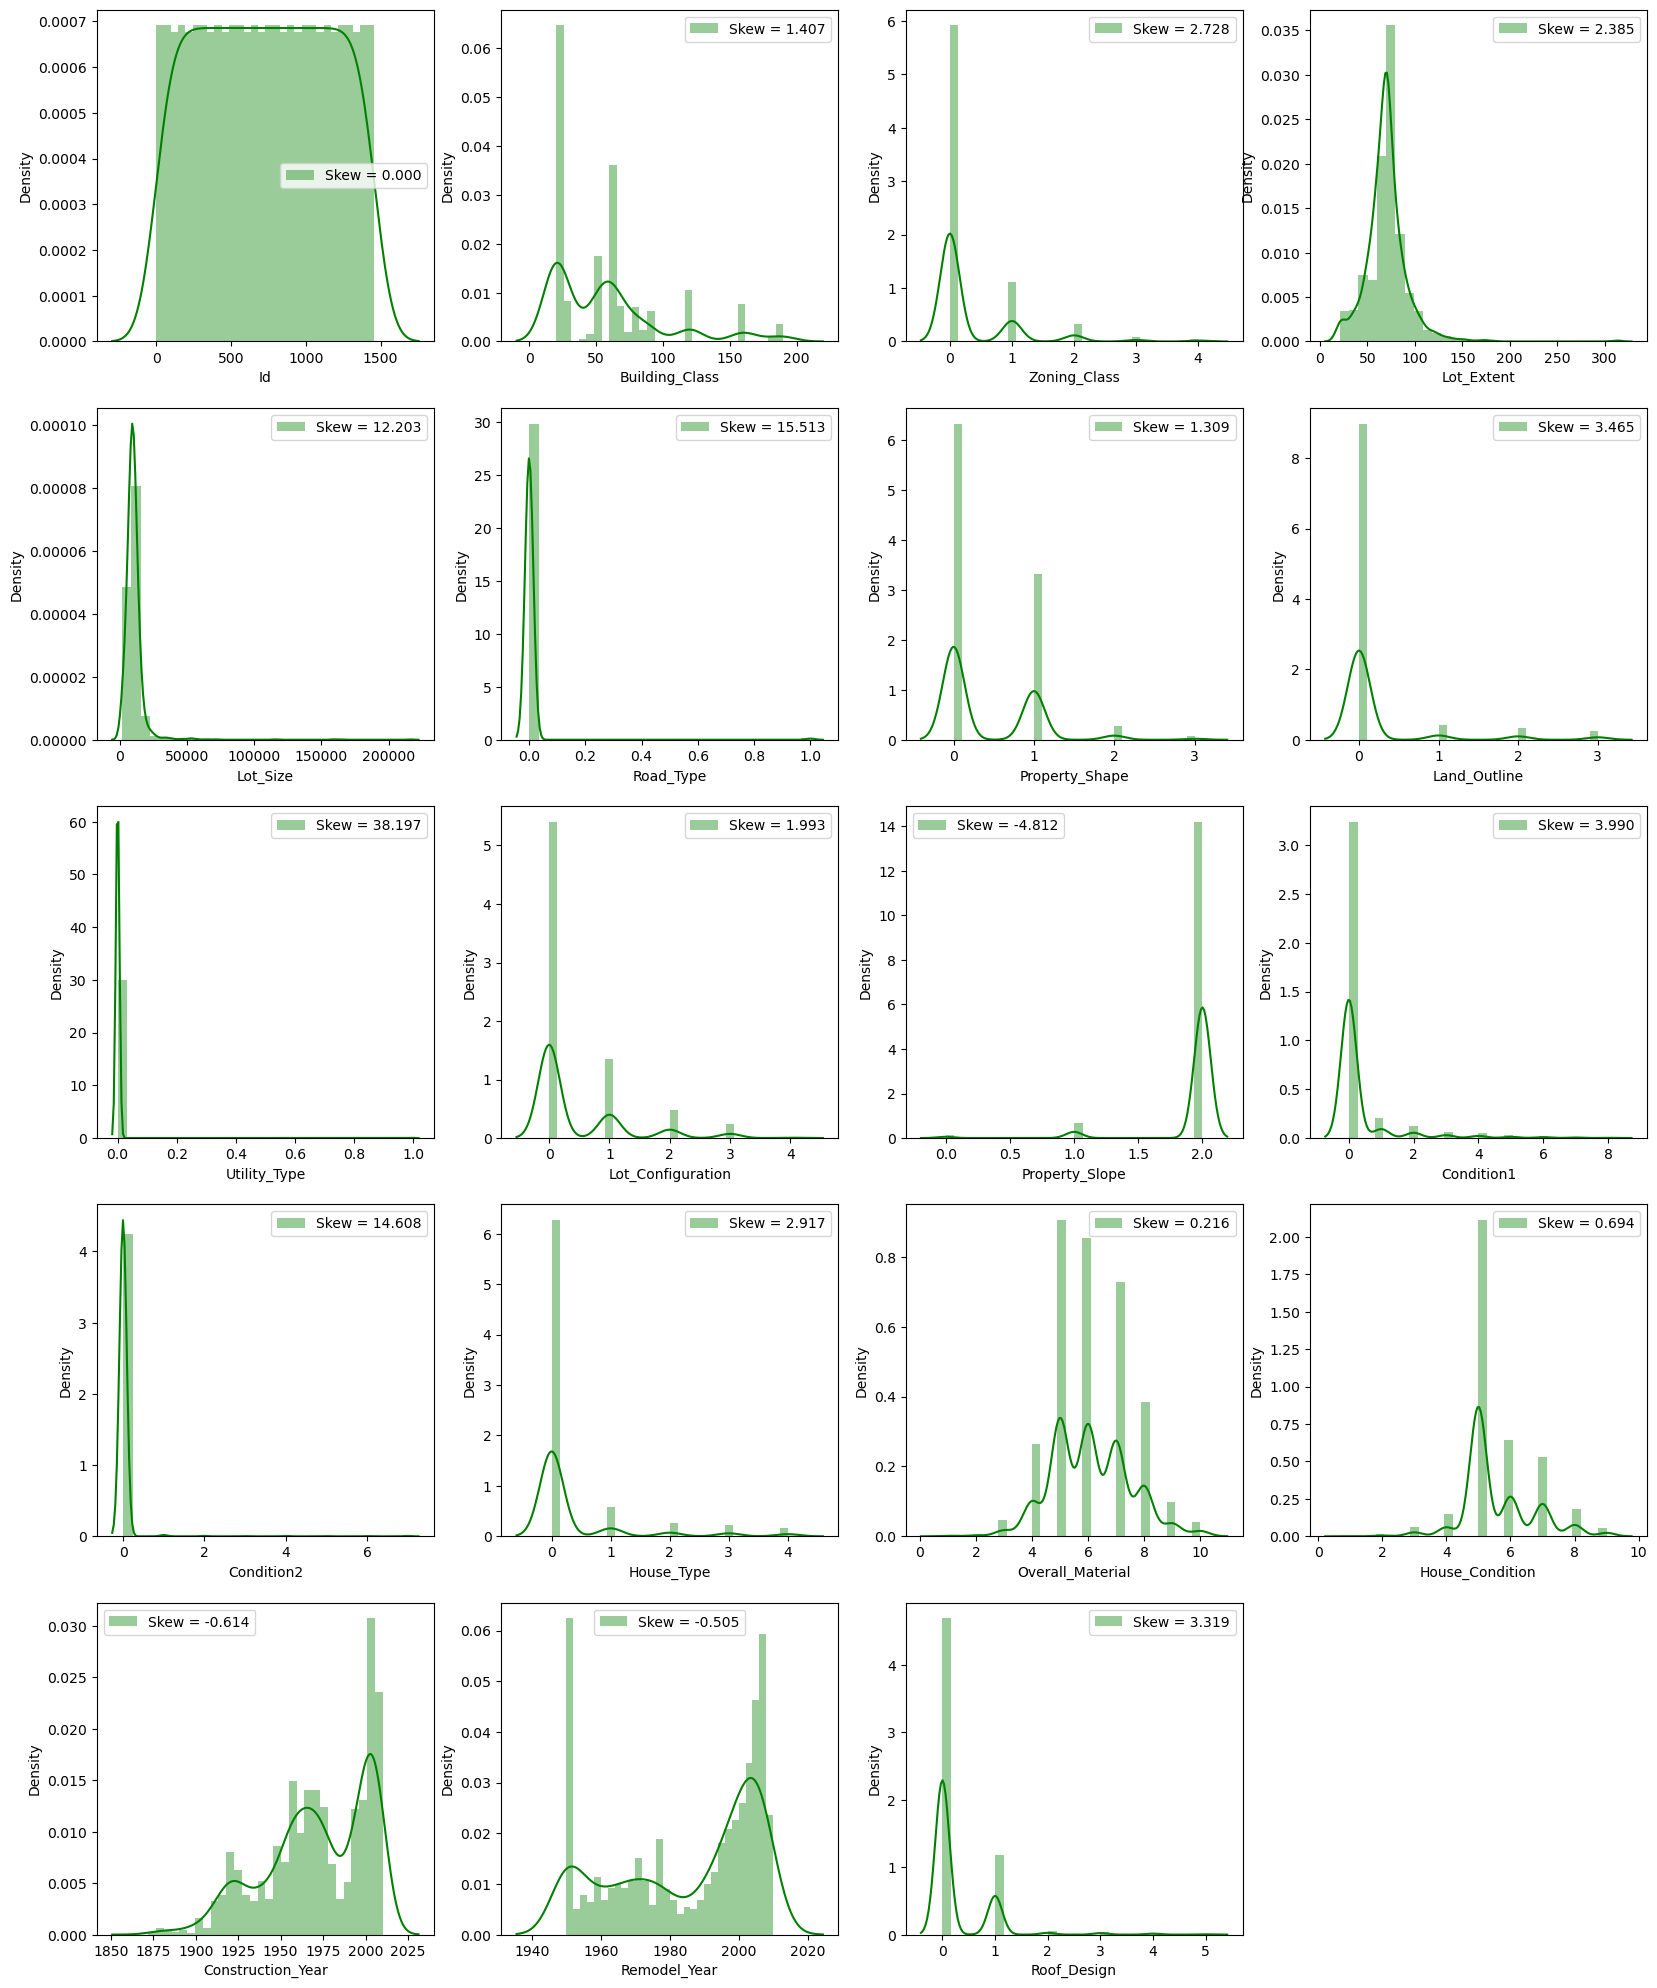

In [131]:
a=[cols for cols in pp.columns if pp[cols].dtypes != 'O']
plotnumber = 1
plt.figure(figsize=(20,25))
for i in a:
    if plotnumber<= 19:
        ax = plt.subplot(5,4,plotnumber)
        skew = pp[i].skew()
        sns.distplot(pp[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='green')
        plt.legend(loc='best')
    plotnumber+=1
plt.show()

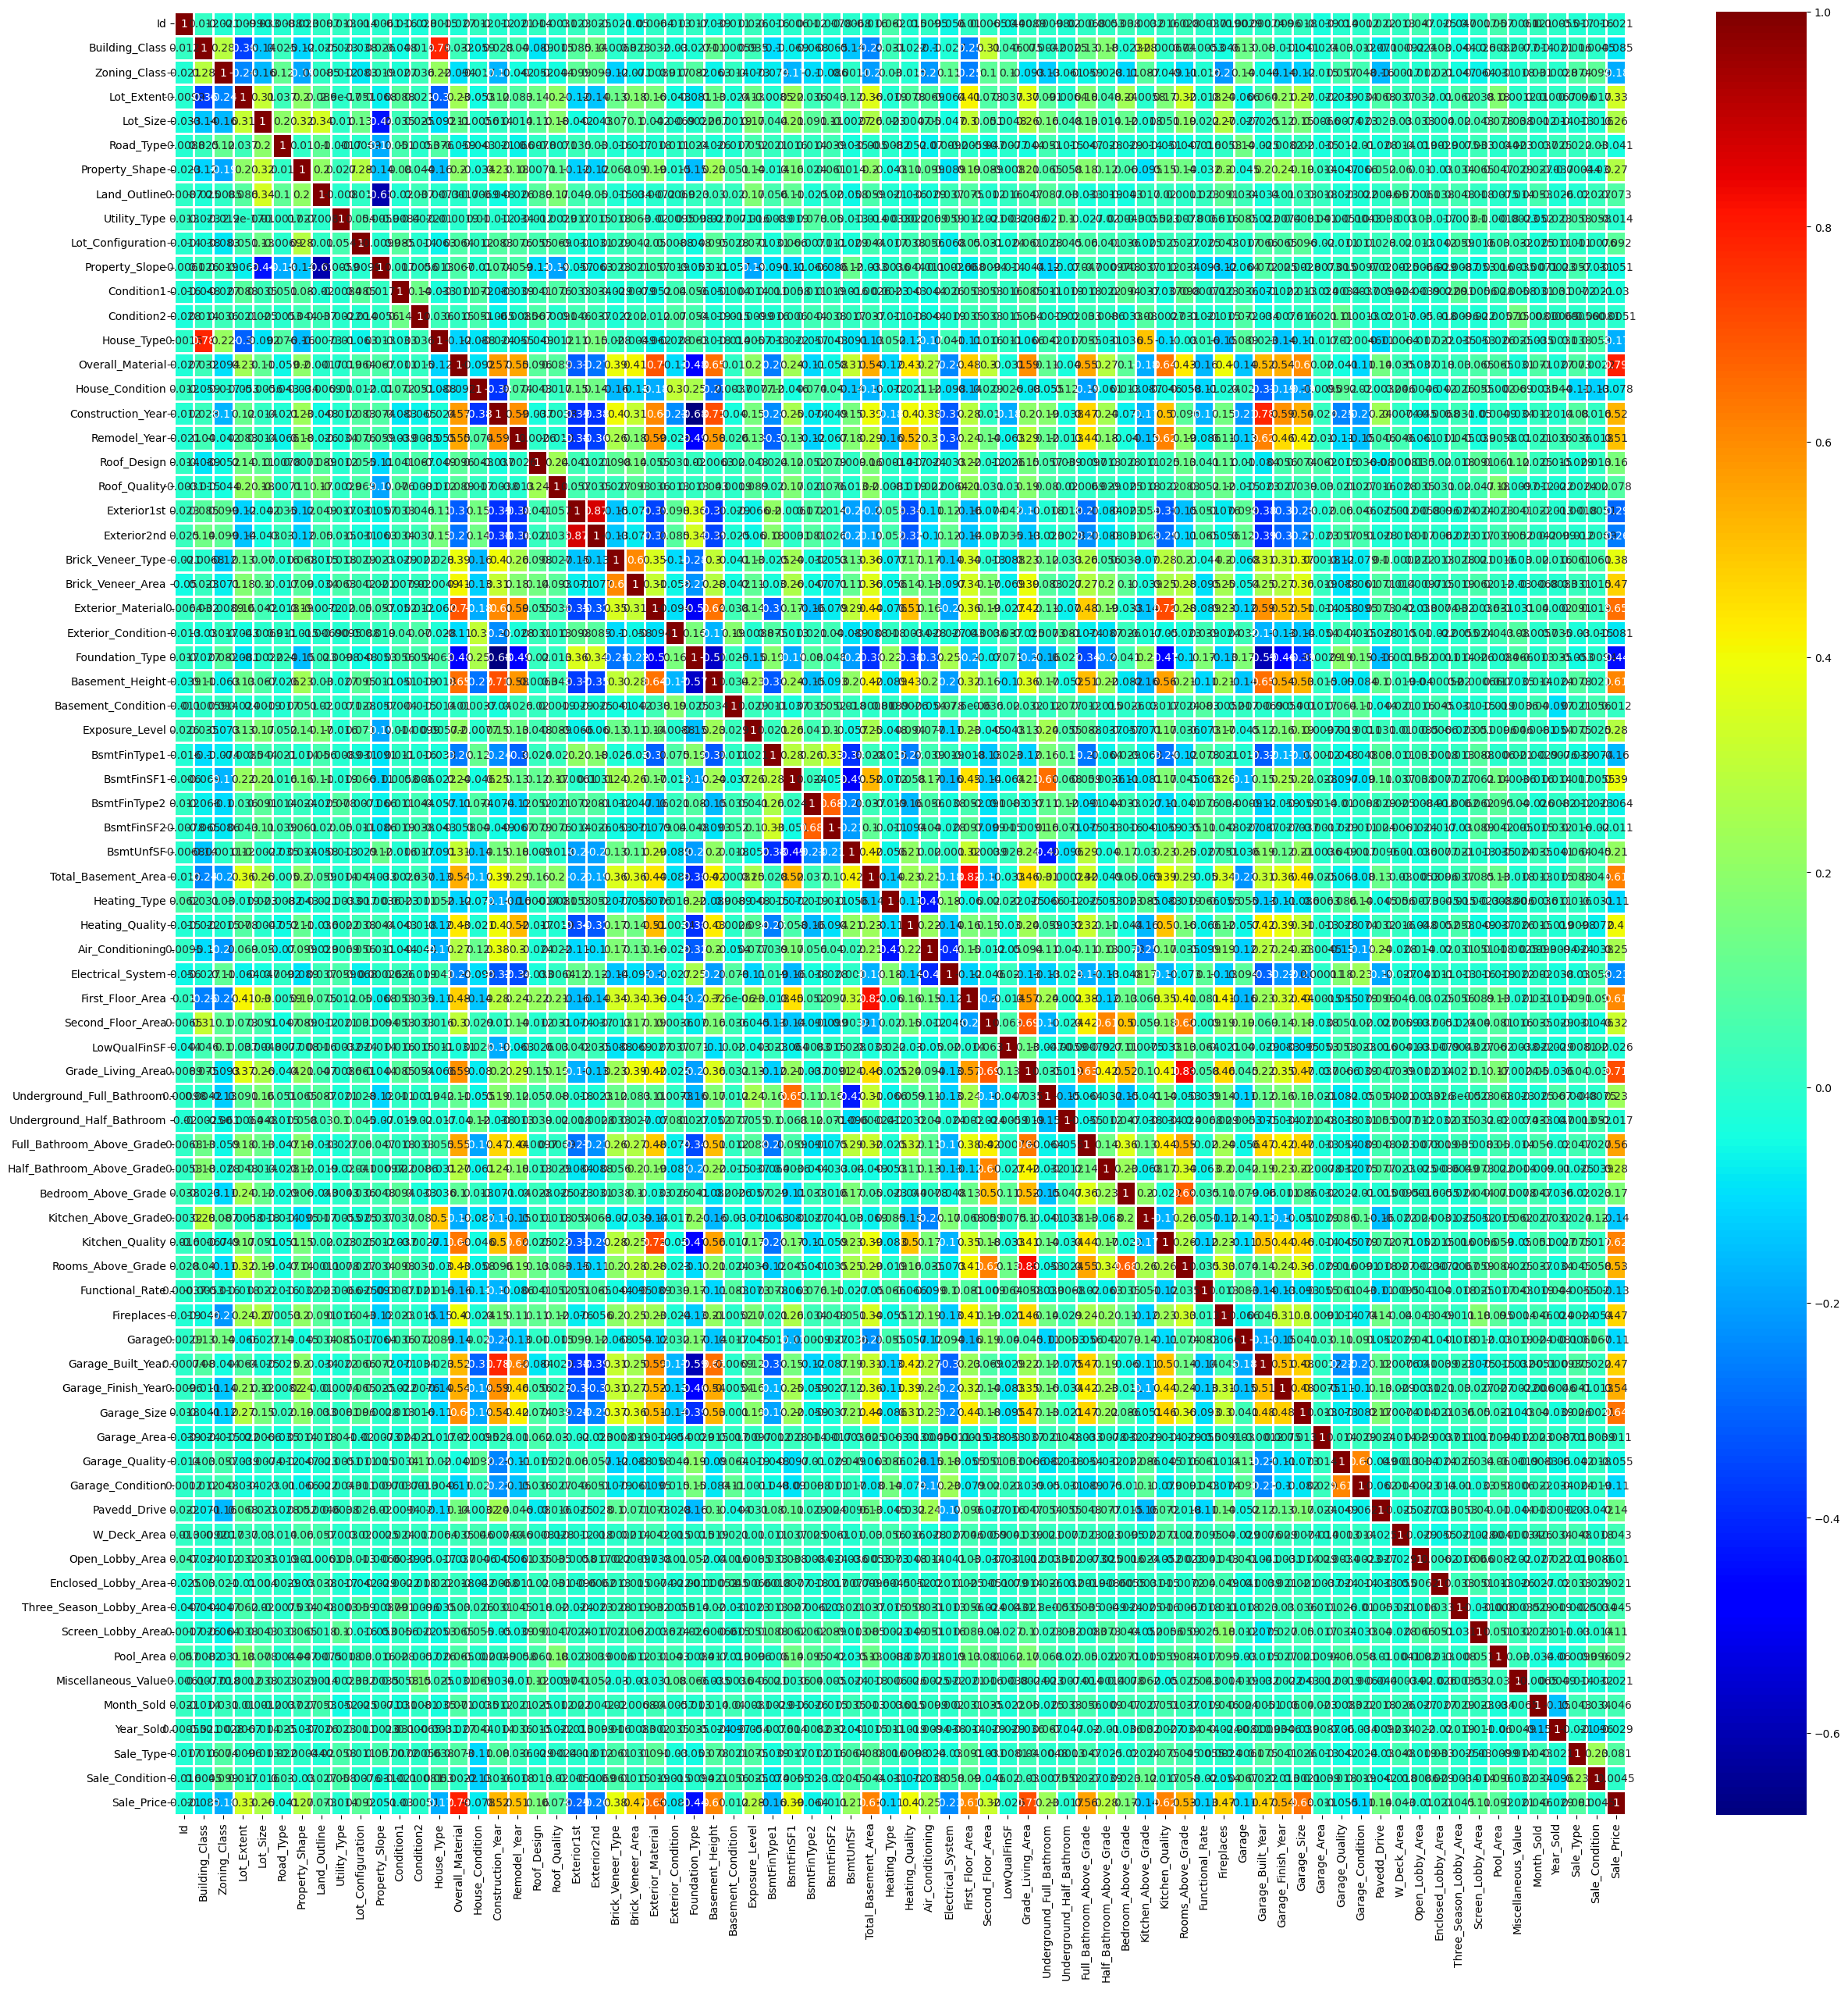

In [132]:
plt.figure(figsize=(30, 30))  
sns.heatmap(data=pp.corr(), cmap="jet", annot=True, linewidths=1, linecolor='white')
plt.show()

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
pp_train , pp_test = train_test_split(pp, test_size= 0.2 )
pp.head(4)

Id  Building_Class  Zoning_Class  Lot_Extent  Lot_Size  Road_Type  \
0   1              60             0        65.0      8450          0   
1   2              20             0        80.0      9600          0   
2   3              60             0        68.0     11250          0   
3   4              70             0        60.0      9550          0   

   Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  ...  \
0               0             0             0                  0  ...   
1               0             0             0                  3  ...   
2               1             0             0                  0  ...   
3               1             0             0                  1  ...   

   Enclosed_Lobby_Area  Three_Season_Lobby_Area  Screen_Lobby_Area  Pool_Area  \
0            20.337934                        0                  0          0   
1            15.039392                        0                  0          0   
2           -46.232198                        0                  0          0   
3            60.921821                        0                  0          0   

   Miscellaneous_Value  Month_Sold  Year_Sold  Sale_Type  Sale_Condition  \
0                    0           2       2008          0               0   
1                    0           5       2007          0               0   
2                    0           9       2008          0               0   
3                    0           2       2006          0               2   

   Sale_Price  
0      208500  
1      181500  
2      223500  
3      140000  

[4 rows x 74 columns]

In [135]:
xtrain = pp_train.iloc[: , :-1]
ytrain = pp_train.iloc[: , -1]

xtest = pp_test.iloc[: , :-1]
ytest = pp_test.iloc[: , -1]

### Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
linreg = LinearRegression()

In [138]:

linreg.fit(xtrain, ytrain)

LinearRegression()

In [139]:
pred_tst_y = linreg.predict(xtest)

In [140]:
rsquare = linreg.score(xtrain, ytrain)
rsquare

0.8621950976885151

In [141]:
N = xtrain.shape[0]
K = xtrain.shape[1]
adjRsquare = 1 - (1-rsquare)*(N - 1)/(N-K-1)
adjRsquare

0.8529912936000079

In [142]:
# find prediced tr_y
pred_tr_y = linreg.predict(xtrain)

# find error btw actual(tr_y) and predicted(pred_tr_y)
err_tr = ytrain - pred_tr_y
err_tr

# mean of the error terms shoulb be close to zero
import numpy as np
np.mean(err_tr) 

-1.1559233433329967e-10

#### Assumptions

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   2.,   1.,   5.,  31., 165., 369., 372., 159.,  29.,  19.,
          4.,   1.,   3.,   2.,   0.,   0.,   1.,   2.]),
 array([-342181.17716946, -323262.94535557, -304344.71354167,
        -285426.48172778, -266508.24991389, -247590.0181    ,
        -228671.7862861 , -209753.55447221, -190835.32265832,
        -171917.09084443, -152998.85903053, -134080.62721664,
        -115162.39540275,  -96244.16358885,  -77325.93177496,
         -58407.69996107,  -39489.46814718,  -20571.23633328,
          -1653.00451939,   17265.2272945 ,   36183.45910839,
          55101.69092229,   74019.92273618,   92938.15455007,
         111856.38636396,  130774.61817786,  149692.84999175,
         168611.08180564,  187529.31361954,  206447.54543343,
         225365.77724732]),
 <BarContainer object of 30 artists>)

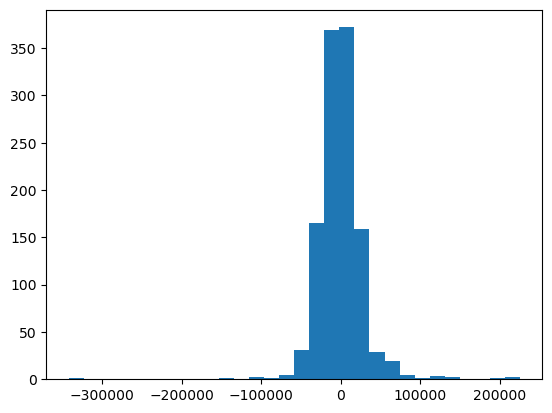

In [143]:
import matplotlib.pyplot as plt

plt.hist(err_tr , bins = 30)

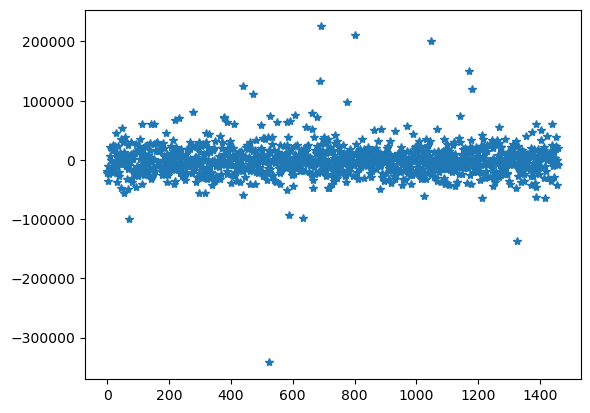

In [144]:
# scatter plot
plt.plot(err_tr , "*") 

In [145]:
pred_act = pd.DataFrame()
pred_act['actual']= ytrain
pred_act['predicted'] = pred_tr_y
pred_act

actual      predicted
1436  120500  108401.991665
491   133000  146819.981722
85    260000  279091.870650
568   316600  316157.638521
1039   80000   54295.157133
...      ...            ...
340   202900  231095.650463
889   149500  178639.690763
267   179500  161324.580583
126   128000  125941.181129
1229  127000  112015.632601

[1167 rows x 2 columns]

<Axes: xlabel='actual', ylabel='predicted'>

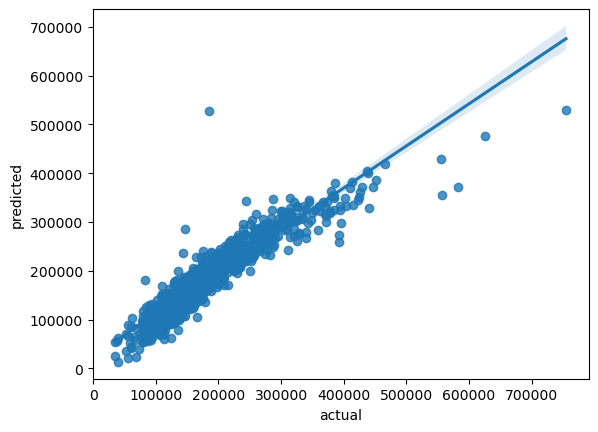

In [146]:
import seaborn as sns
sns.regplot(x = "actual" , y = "predicted" , data  = pred_act ) 

In [147]:
# Lets Find  MSE , RMSE , MAPE 
pred_tst_y
err_tst = ytest - pred_tst_y
MSE = np.mean(np.square(err_tst))
MSE

2366381680.3473535

In [148]:
RMSE = np.sqrt(MSE)
RMSE

48645.4692684463

In [149]:

MAPE = np.mean(np.abs(err_tst *100 / ytest))
MAPE

12.458746286019686